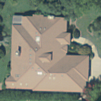

In [26]:
Image.fromarray(X_train[1499].astype('uint8'))
Image.fromarray(X_test[557].astype('uint8'))

In [20]:
X_train.shape[1:]

array([[[ 61.,  84.,  89.],
        [ 49.,  71.,  87.],
        [ 48.,  64.,  81.],
        ...,
        [131., 129., 122.],
        [132., 129., 125.],
        [132., 130., 123.]],

       [[ 55.,  68.,  81.],
        [ 58.,  69.,  79.],
        [ 56.,  67.,  81.],
        ...,
        [131., 128., 125.],
        [133., 130., 127.],
        [134., 131., 127.]],

       [[ 58.,  67.,  77.],
        [ 59.,  68.,  76.],
        [ 60.,  70.,  75.],
        ...,
        [125., 125., 124.],
        [129., 127., 125.],
        [131., 128., 125.]],

       ...,

       [[179., 183., 170.],
        [179., 184., 170.],
        [175., 183., 172.],
        ...,
        [173., 174., 161.],
        [175., 176., 162.],
        [175., 177., 162.]],

       [[178., 184., 168.],
        [175., 182., 165.],
        [176., 182., 165.],
        ...,
        [163., 157., 145.],
        [169., 158., 149.],
        [173., 165., 156.]],

       [[182., 176., 163.],
        [181., 175., 162.],
        [185., 1

In [2]:
# load the files
import glob
import numpy as np
import pandas as pd

from PIL import Image

X_train_path = "./training/*"
X_test_path = "./testing/*"

X_train = np.zeros(shape=(1500, 101, 101, 3))
for img_path in glob.glob(X_train_path):
    image_index = int(img_path.split("/")[-1].split(".")[0])
    im = Image.open(img_path)
    X_train[image_index] = np.array(im)
    pass

X_test = np.zeros(shape=(558, 101, 101, 3))
for img_path in glob.glob(X_test_path):
    image_index = int(img_path.split("/")[-1].split(".")[0]) - 1500
    im = Image.open(img_path)
    X_test[image_index] = np.array(im)
    pass

Y_train = pd.read_csv("labels_training.csv")["label"].values

In [50]:
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import keras

model = Sequential()
model.add(BatchNormalization(input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          shuffle = True,
          validation_split=0.3)

Train on 1050 samples, validate on 450 samples
Epoch 1/5
1050/1050 [==============================] - 10s 10ms/step - loss: 4.0279 - acc: 0.6505 - val_loss: 3.5893 - val_acc: 0.6911
Epoch 2/5
1050/1050 [==============================] - 9s 8ms/step - loss: 3.4034 - acc: 0.7390 - val_loss: 3.6455 - val_acc: 0.7111
Epoch 3/5
1050/1050 [==============================] - 9s 8ms/step - loss: 2.5141 - acc: 0.7990 - val_loss: 2.8748 - val_acc: 0.7444
Epoch 4/5
1050/1050 [==============================] - 9s 8ms/step - loss: 1.8085 - acc: 0.8571 - val_loss: 3.1851 - val_acc: 0.7467
Epoch 5/5
1050/1050 [==============================] - 9s 8ms/step - loss: 1.5486 - acc: 0.8724 - val_loss: 2.8570 - val_acc: 0.7467


In [23]:
Y_train[4]

1

In [41]:
y_hat = model.predict(X_test)

In [48]:
x = 1674
y_hat[x - 1500]

array([1.], dtype=float32)